# Context

# Features

In [1]:
#imprting libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split

#for accuracy
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

#For modelling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

C:\Users\dell\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#installing Zipcode for fetching zip code

In [3]:
!pip install zipcodes

In [4]:
import zipcodes as zcode #installing zipcode library 

In [5]:
pd.set_option("display.max_columns",None)


In [6]:
#Reading data
df=pd.read_csv("Bank_Personal_Loan_Modelling.csv")
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [7]:
df_loan=df.copy()

In [8]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [9]:
#checking missing value
df_loan.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [10]:
#checking duplicacy of data
df_loan.duplicated().sum()

0

**There is no missing value and no duplicate data

In [11]:
df_loan_columns=df_loan.columns.to_list()
print("features:\n\n ",df_loan_columns)

features:

  ['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']


In [12]:
print(f"unique values:\n\n {df_loan.nunique()}")

unique values:

 ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64


In [13]:
#ID column is not needed can be removed from the dataset

In [14]:
df_loan.drop(["ID"],axis=1,inplace=True)

In [15]:
#statistical kowledge about the data

# def statistics_data(dataset):
    
#     for col in dataset.columns:
        
#         print(f"{col}:")
        
#         print(f"Count of the {col} is: {len(dataset[col])}")
#         print(f"Mean value of the {col} is: {round(dataset[col].mean(),2)}")
#         print(f"Standard Deviation of the {col} is: {round(dataset[col].std(),2)}")
#         print(f"Minimum Value of the {col} is: {dataset[col].min()} ")
#         print(f"Maximum value of the {col} is: {dataset[col].max()} ")
#         print(f"25 Percentile value of the {col} is: {np.percentile(dataset[col],25)}" )
#         print(f"50 Percentile value of the {col} is: {np.percentile(dataset[col],50)} " )
#         print(f"75 Percentile value of the {col} is: {np.percentile(dataset[col],75)} \n\n" )
#         print("#"*10)
        

# Data Preprocessing

In [16]:
df_loan.rename(columns={"ZIP Code":"ZIPCode","Personal Loan":"PersonalLoan","Securities Account":"SecuritiesAccount","CD Account":'CDAccount'},inplace=True)

In [17]:
df_loan.ZIPCode.nunique()

467

In [18]:
list_zipcode=df_loan.ZIPCode.unique()

In [19]:
#here i am creating a dictionary of county by using library zipcode and matching method.
dict_zip={}
for zipcode in list_zipcode:
    my_city_county=zcode.matching(zipcode.astype("str"))
    if len(my_city_county)==1: # if  zipcode is present then get county else, assign zipcode to county
        county=my_city_county[0].get('county')
    else:
        county=zipcode
    
    dict_zip.update({zipcode:county})

In [20]:
dict_zip

{91107: 'Los Angeles County',
 90089: 'Los Angeles County',
 94720: 'Alameda County',
 94112: 'San Francisco County',
 91330: 'Los Angeles County',
 92121: 'San Diego County',
 91711: 'Los Angeles County',
 93943: 'Monterey County',
 93023: 'Ventura County',
 94710: 'Alameda County',
 90277: 'Los Angeles County',
 93106: 'Santa Barbara County',
 94920: 'Marin County',
 91741: 'Los Angeles County',
 95054: 'Santa Clara County',
 95010: 'Santa Cruz County',
 94305: 'Santa Clara County',
 91604: 'Los Angeles County',
 94015: 'San Mateo County',
 90095: 'Los Angeles County',
 91320: 'Ventura County',
 95521: 'Humboldt County',
 95064: 'Santa Cruz County',
 90064: 'Los Angeles County',
 94539: 'Alameda County',
 94104: 'San Francisco County',
 94117: 'San Francisco County',
 94801: 'Contra Costa County',
 94035: 'Santa Clara County',
 92647: 'Orange County',
 95814: 'Sacramento County',
 94114: 'San Francisco County',
 94115: 'San Francisco County',
 92672: 'Orange County',
 94122: 'San Fra

In [21]:
dict_zip.update({"92634":"Orange County","93077":"Lower Bavaria","92717":"Orange County","96651":"U.S. - United States"})

In [22]:
df_loan["County"]=df_loan["ZIPCode"].map(dict_zip)

In [23]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                5000 non-null   int64  
 1   Experience         5000 non-null   int64  
 2   Income             5000 non-null   int64  
 3   ZIPCode            5000 non-null   int64  
 4   Family             5000 non-null   int64  
 5   CCAvg              5000 non-null   float64
 6   Education          5000 non-null   int64  
 7   Mortgage           5000 non-null   int64  
 8   PersonalLoan       5000 non-null   int64  
 9   SecuritiesAccount  5000 non-null   int64  
 10  CDAccount          5000 non-null   int64  
 11  Online             5000 non-null   int64  
 12  CreditCard         5000 non-null   int64  
 13  County             5000 non-null   object 
dtypes: float64(1), int64(12), object(1)
memory usage: 547.0+ KB


In [24]:
df_loan.County.nunique()

42

## Fixing the data types

In [25]:
# converting categorical varaible to category type
category_col = ['PersonalLoan', 'SecuritiesAccount','Family', 'CDAccount', 'Online', 'CreditCard', 'ZIPCode', 'Education','County']
df_loan[category_col] = df_loan[category_col].astype('category')

In [26]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Age                5000 non-null   int64   
 1   Experience         5000 non-null   int64   
 2   Income             5000 non-null   int64   
 3   ZIPCode            5000 non-null   category
 4   Family             5000 non-null   category
 5   CCAvg              5000 non-null   float64 
 6   Education          5000 non-null   category
 7   Mortgage           5000 non-null   int64   
 8   PersonalLoan       5000 non-null   category
 9   SecuritiesAccount  5000 non-null   category
 10  CDAccount          5000 non-null   category
 11  Online             5000 non-null   category
 12  CreditCard         5000 non-null   category
 13  County             5000 non-null   category
dtypes: category(9), float64(1), int64(4)
memory usage: 266.4 KB


In [27]:
df_loan[df_loan['Experience']==0]['Age'].describe()

count    66.000000
mean     25.636364
std       1.145377
min      24.000000
25%      25.000000
50%      26.000000
75%      26.000000
max      30.000000
Name: Age, dtype: float64

In [28]:
#checking negative value


In [29]:
for col in df_loan.columns:
    print(col)
    print(df_loan[col].unique())

Age
[25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40
 30 31 51 32 61 41 28 49 47 62 58 54 33 27 66 24 52 26 64 63 23]
Experience
[ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 -1 34  0 38 40 33  4 -2 42 -3 43]
Income
[ 49  34  11 100  45  29  72  22  81 180 105 114  40 112 130 193  21  25
  63  62  43 152  83 158  48 119  35  41  18  50 121  71 141  80  84  60
 132 104  52 194   8 131 190  44 139  93 188  39 125  32  20 115  69  85
 135  12 133  19  82 109  42  78  51 113 118  64 161  94  15  74  30  38
   9  92  61  73  70 149  98 128  31  58  54 124 163  24  79 134  23  13
 138 171 168  65  10 148 159 169 144 165  59  68  91 172  55 155  53  89
  28  75 170 120  99 111  33 129 122 150 195 110 101 191 140 153 173 174
  90 179 145 200 183 182  88 160 205 164  14 175 103 108 185 204 154 102
 192 202 162 142  95 184 181 143 123 178 198 201 203 189 151 199 224 218]
ZIPCode
[91107, 90089, 94720, 94112, 9

In [30]:
#only experince column have negative value

In [31]:
df_loan[df_loan['Experience']<0]['Age'].describe()

count    52.000000
mean     24.519231
std       1.475159
min      23.000000
25%      24.000000
50%      24.000000
75%      25.000000
max      29.000000
Name: Age, dtype: float64

In [32]:
df_loan.groupby(['Age',"Education"])['Experience'].describe().T

Age              23                   24                       25              
Education         1         2          1        2    3          1          2   
count      7.000000  5.000000  13.000000  8.00000  7.0  23.000000  11.000000  \
mean      -1.285714 -2.200000  -0.692308 -0.87500 -2.0   0.521739  -0.272727   
std        0.755929  0.447214   0.947331  0.64087  1.0   0.790257   0.646670   
min       -3.000000 -3.000000  -2.000000 -2.00000 -3.0  -1.000000  -1.000000   
25%       -1.000000 -2.000000  -2.000000 -1.00000 -2.5   0.000000  -1.000000   
50%       -1.000000 -2.000000   0.000000 -1.00000 -2.0   1.000000   0.000000   
75%       -1.000000 -2.000000   0.000000 -0.75000 -2.0   1.000000   0.000000   
max       -1.000000 -2.000000   0.000000  0.00000  0.0   1.000000   1.000000   

Age                          26                              27              
Education          3          1         2          3          1          2   
count      19.000000  30.000000  24.00000  24.000000  39.000000  24.000000  \
mean       -0.526316   1.433333   0.75000   0.583333   2.461538   1.666667   
std         0.696692   0.817200   0.84699   0.717282   0.755546   1.049500   
min        -2.000000   0.000000  -1.00000   0.000000   1.000000   0.000000   
25%        -1.000000   1.000000   0.00000   0.000000   2.000000   1.000000   
50%        -1.000000   2.000000   1.00000   0.000000   3.000000   1.500000   
75%         0.000000   2.000000   1.00000   1.000000   3.000000   3.000000   
max         1.000000   2.000000   2.00000   2.000000   3.000000   3.000000   

Age                          28                               29              
Education          3          1          2          3          1          2   
count      28.000000  47.000000  34.000000  22.000000  50.000000  38.000000  \
mean        1.392857   3.255319   2.911765   2.409091   4.080000   3.789474   
std         0.994030   0.765225   0.933149   1.181568   0.899887   1.118829   
min         0.000000   2.000000   1.000000  -2.000000   3.000000   2.000000   
25%         1.000000   3.000000   2.000000   2.000000   3.000000   3.000000   
50%         1.000000   3.000000   3.000000   2.500000   4.000000   4.000000   
75%         2.000000   4.000000   4.000000   3.000000   5.000000   5.000000   
max         3.000000   4.000000   4.000000   4.000000   5.000000   5.000000   

Age                          30                               31              
Education          3          1          2          3          1          2   
count      35.000000  53.000000  48.000000  35.000000  51.000000  41.000000  \
mean        3.114286   5.018868   4.645833   4.914286   5.882353   5.512195   
std         1.622841   0.865816   1.020838   1.172514   0.840168   1.098225   
min        -1.000000   4.000000   3.000000   0.000000   5.000000   4.000000   
25%         3.000000   4.000000   4.000000   4.000000   5.000000   5.000000   
50%         3.000000   5.000000   5.000000   5.000000   6.000000   5.000000   
75%         4.000000   6.000000   5.250000   6.000000   7.000000   7.000000   
max         5.000000   6.000000   6.000000   6.000000   7.000000   7.000000   

Age                          32                               33              
Education          3          1          2          3          1          2   
count      33.000000  60.000000  34.000000  26.000000  53.000000  34.000000  \
mean        5.090909   6.950000   6.941176   6.500000   8.018868   7.617647   
std         1.958374   0.768556   0.982920   1.606238   0.771875   1.181029   
min         1.000000   6.000000   5.000000   2.000000   7.000000   6.000000   
25%         5.000000   6.000000   6.000000   6.000000   7.000000   7.000000   
50%         5.000000   7.000000   7.000000   6.000000   8.000000   7.000000   
75%         7.000000   8.000000   8.000000   8.000000   9.000000   9.000000   
max         7.000000   8.000000   8.000000   8.000000   9.000000   9.000000   

Age                          34              

# Exploratory Data Analysis

In [33]:
df_loan.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0


In [34]:
for col in df_loan.columns:
        print(col,"\n")
        print(df_loan[col].value_counts(),'\n')
        
    

Age 

Age
35    151
43    149
52    145
54    143
58    143
50    138
41    136
30    136
56    135
34    134
39    133
57    132
59    132
51    129
45    127
60    127
46    127
42    126
31    125
40    125
55    125
29    123
62    123
61    122
44    121
32    120
33    120
48    118
38    115
49    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
67     12
23     12
Name: count, dtype: int64 

Experience 

Experience
 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 16    127
 14    127
 30    126
 17    125
 34    125
 27    125
 22    124
 29    124
 7     121
 6     119
 15    119
 8     119
 10    118
 13    117
 33    117
 11    116
 37    116
 36    114
 21    113
 4     113
 31    104
 12    102
 38     88
 2      85
 39     85
 1      74
 0      66
 40     57
 41     43
-1      33
-2      15
 42 

# Univariate Analysis

In [35]:
def dist_box(data):
    fig,(ax_box,ax_dis)=plt.subplots(nrows=2,figsize=(8,5))
    Name=data.name.upper()
    mean=data.mean()
    median=data.median()
    mode=data.mode()[0]
    sns.set_theme(style='white')
    fig.suptitle("SPRED OF THE DATA"+" "+ Name,fontsize=15,fontweight="bold")
    sns.boxplot(data,ax=ax_box,color='violet',orient='h')
    sns.despine(top="true",left="true",right="true")
    sns.distplot(data,kde=False,color="blue",ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='--',linewidth=2)
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})

In [36]:
df_loan_num=[col for col in df_loan.columns if df_loan[col].dtypes!="category"]
df_loan_num

['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

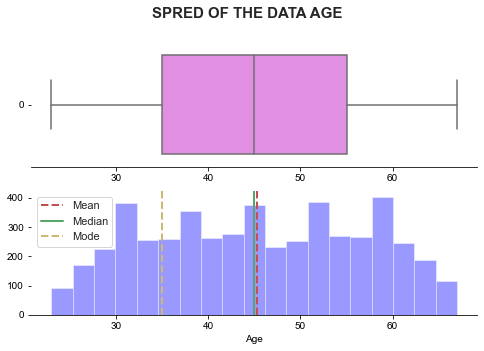

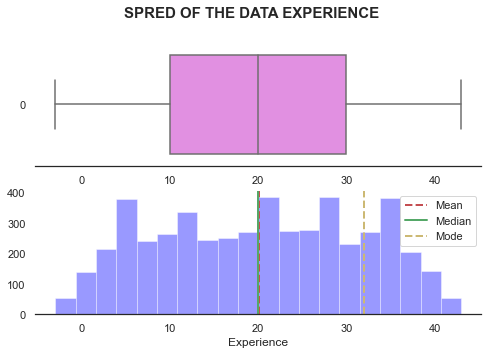

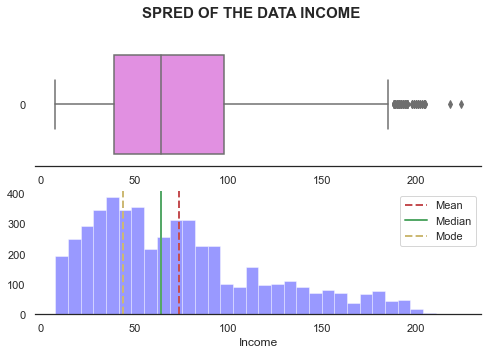

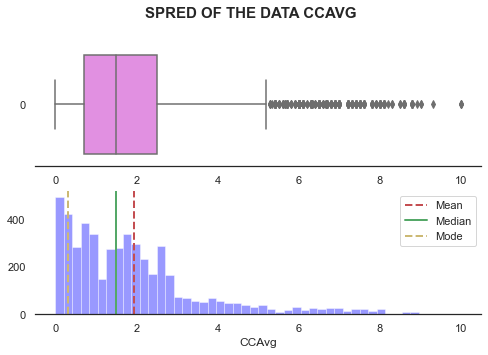

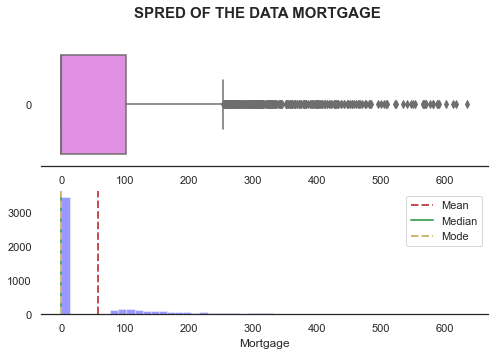

In [37]:
for col in df_loan_num:

    dist_box(df_loan[col])

In [38]:
df_loan["Agebin"]=pd.cut(df_loan["Age"],bins=[0,30,40,50,60,100],labels=['18-30','31-40','41-50','51-60','61-100'])

In [39]:
df_loan

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,County,Agebin
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,Los Angeles County,18-30
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,Los Angeles County,41-50
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,Alameda County,31-40
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,San Francisco County,31-40
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,Los Angeles County,31-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,0,1,0,Orange County,18-30
4996,30,4,15,92037,4,0.4,1,85,0,0,0,1,0,San Diego County,18-30
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0,0,Ventura County,61-100
4998,65,40,49,90034,3,0.5,2,0,0,0,0,1,0,Los Angeles County,61-100


In [40]:
df_loan["Income_group"]=pd.cut(df_loan['Income'],bins=[0,50,140,224],labels=["Lower","Middle","High"])

In [41]:
df_loan

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,County,Agebin,Income_group
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,Los Angeles County,18-30,Lower
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,Los Angeles County,41-50,Lower
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,Alameda County,31-40,Lower
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,San Francisco County,31-40,Middle
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,Los Angeles County,31-40,Lower
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,0,1,0,Orange County,18-30,Lower
4996,30,4,15,92037,4,0.4,1,85,0,0,0,1,0,San Diego County,18-30,Lower
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0,0,Ventura County,61-100,Lower
4998,65,40,49,90034,3,0.5,2,0,0,0,0,1,0,Los Angeles County,61-100,Lower


In [42]:
df_loan["CCAvg"].describe()

count    5000.000000
mean        1.937938
std         1.747659
min         0.000000
25%         0.700000
50%         1.500000
75%         2.500000
max        10.000000
Name: CCAvg, dtype: float64

In [43]:
df_loan["Spending"]=pd.cut(df_loan['CCAvg'],bins=[0.000000,0.700000,2.500000,10.00000],labels=["Lower","Middle","Upper"],include_lowest=True)

In [44]:
#making a list of all categorical variable

category_columns=[col for col in df_loan.columns if df_loan[col].dtypes=="category"]



#ZIPCode  and County have two many value we will use it seperatly in graph

In [45]:
cat_col=[]
for col in category_columns:
  
    if col!="ZIPCode" and col!= "County":
        cat_col.append(col)

In [46]:
cat_col

['Family',
 'Education',
 'PersonalLoan',
 'SecuritiesAccount',
 'CDAccount',
 'Online',
 'CreditCard',
 'Agebin',
 'Income_group',
 'Spending']

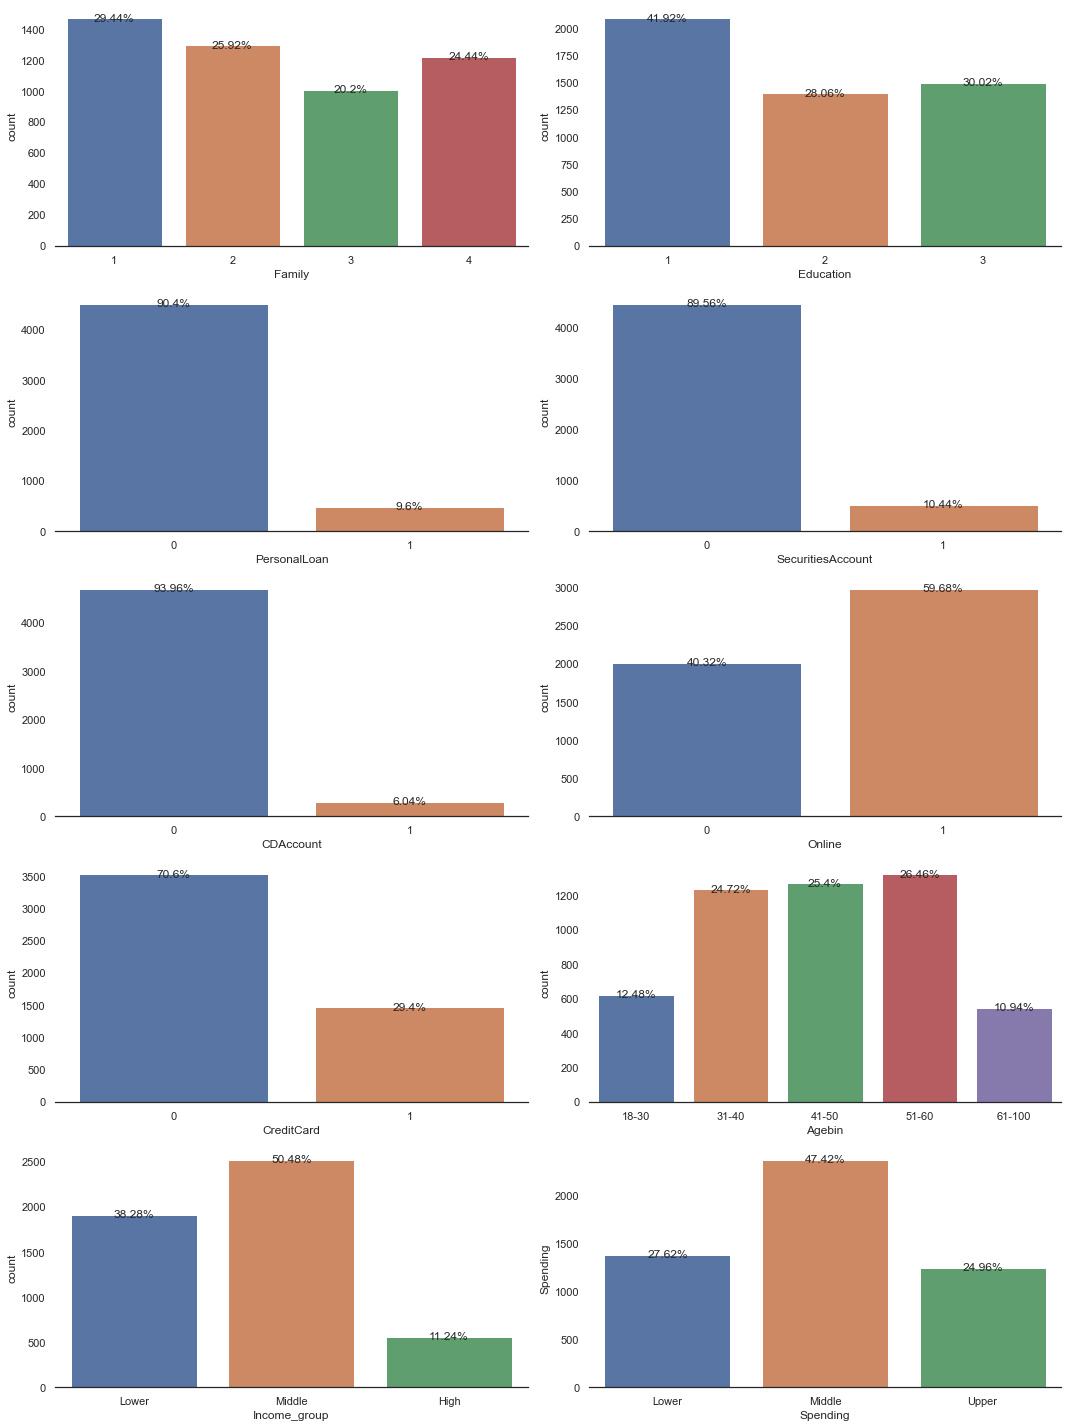

In [47]:


fig,ax=plt.subplots(nrows=5,ncols=2,figsize=(15,20))

i=0

ax=ax.flatten()

for col in cat_col:
  
    
   
    graph=sns.countplot(x=df_loan[col],ax=ax[i])
    i+=1
    for f in graph.patches:
        text=f"{(f.get_height()/len(df_loan[col])*100).round(2)}%"
        graph.annotate(text,(f.get_x()+f.get_width()/2,f.get_height()),ha='center',va="center")
        sns.despine(top=True,right=True,left=True)
        plt.tight_layout()
        plt.ylabel(col)
   
plt.show()


In [48]:
df_loan.groupby(['County','PersonalLoan'])['PersonalLoan'].agg({'size'}).unstack()

size     
PersonalLoan              0    1
County                          
9307                      1    0
92634                     5    0
92717                    19    3
96651                     6    0
Alameda County          456   44
Butte County             17    2
Contra Costa County      73   12
El Dorado County         16    1
Fresno County            24    2
Humboldt County          30    2
Imperial County           3    0
Kern County              47    7
Lake County               4    0
Los Angeles County      984  111
Marin County             48    6
Mendocino County          7    1
Merced County             4    0
Monterey County         113   15
Napa County               3    0
Orange County           309   30
Placer County            22    2
Riverside County         50    6
Sacramento County       169   15
San Benito County        14    0
San Bernardino County    98    3
San Diego County        509   59
San Francisco County    238   19
San Joaquin County       12    1
San Luis Obispo County   28    5
San Mateo County        192   12
Santa Barbara County    143   11
Santa Clara County      492   71
Santa Cruz County        60    8
Shasta County            15    3
Siskiyou County           7    0
Solano County            30    3
Sonoma County            22    6
Stanislaus County        14    1
Trinity County            4    0
Tuolumne County           7    0
Ventura County          103   11
Yolo County             122    8

In [49]:
df_loan["County"].unique()

['Los Angeles County', 'Alameda County', 'San Francisco County', 'San Diego County', 'Monterey County', ..., 'Stanislaus County', 'Shasta County', 'Tuolumne County', 'Napa County', 'Lake County']
Length: 42
Categories (42, object): [9307, 92634, 92717, 96651, ..., 'Trinity County', 'Tuolumne County', 'Ventura County', 'Yolo County']

In [50]:
counties = {
'Los Angeles County':'Los Angeles Region',
'San Diego County':'Southern',
'Santa Clara County':'Bay Area',
'Alameda County':'Bay Area',
"Oange County":'Southern',

'San Francisco County':'Bay Area',
'San Mateo County':'Bay Area',
'Sacramento County':'Central',
'Santa Barbara County':'Southern',
'Yolo County':'Central',
'Monterey County':'Bay Area',            
'Ventura County':'Southern',             
'San Bernardino County':'Southern',       
'Contra Costa County':'Bay Area',        
'Santa Cruz County':'Bay Area',           
'Riverside County':'Southern',            
'Kern County':'Southern',                 
'Marin County':'Bay Area',                
'San Luis Obispo County':'Southern',     
'Solano County':'Bay Area',              
'Humboldt County':'Superior',            
'Sonoma County':'Bay Area',                
'Fresno County':'Central',               
'Placer County':'Central',                
'Butte County':'Superior',               
'Shasta County':'Superior',                
'El Dorado County':'Central',             
'Stanislaus County':'Central',            
'San Benito County':'Bay Area',          
'San Joaquin County':'Central',           
'Mendocino County':'Superior',             
'Tuolumne County':'Central',                
'Siskiyou County':'Superior',              
'Trinity County':'Superior',                
'Merced County':'Central',                  
'Lake County':'Superior',                 
'Napa County':'Bay Area',                   
'Imperial County':'Southern',
93077:'Southern',
96651:'Bay Area'}

In [51]:

df_loan['Regions'] = df_loan['County'].map(counties)

In [52]:
df_loan["Regions"].unique()

array(['Los Angeles Region', 'Bay Area', 'Southern', 'Superior', nan,
       'Central'], dtype=object)

In [53]:
df_loan.isnull().mean()

Age                  0.0000
Experience           0.0000
Income               0.0000
ZIPCode              0.0000
Family               0.0000
CCAvg                0.0000
Education            0.0000
Mortgage             0.0000
PersonalLoan         0.0000
SecuritiesAccount    0.0000
CDAccount            0.0000
Online               0.0000
CreditCard           0.0000
County               0.0000
Agebin               0.0000
Income_group         0.0000
Spending             0.0000
Regions              0.0734
dtype: float64

In [54]:
df_loan.dropna(inplace=True)

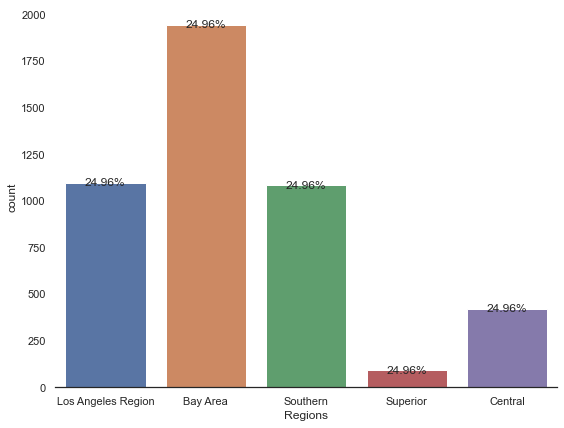

In [55]:
plt.figure(figsize=(9,7))
fig=sns.countplot(x=df_loan['Regions'],data=df_loan)
sns.despine(top=True,right=True,left=True) # to remove side line from graph
for f in fig.patches:
    texf=f"{(f.get_height()/len(df_loan)*100).round(2)}%"
    fig.annotate(text,(f.get_x()+f.get_width()/2,f.get_height()),ha='center',va="center")
plt.show()

# Bivariate & Multivariate Analysis

In [56]:
df_num=df_loan.select_dtypes(exclude=["object","category"]).copy()

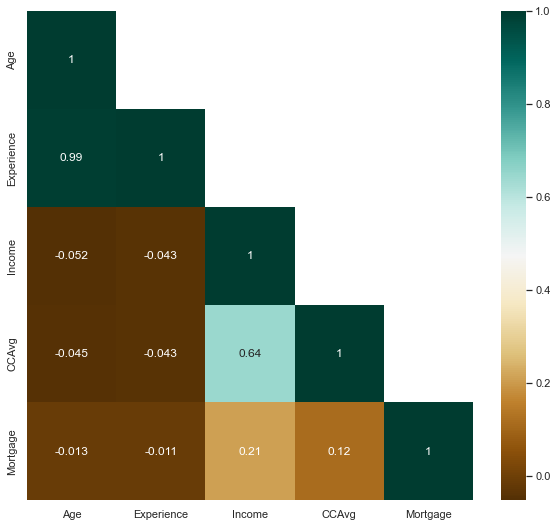

In [57]:
#checking correltion of numeric value
plt.figure(figsize=(10,9))
mask=np.triu(df_num.corr(),1)
sns.heatmap(df_num.corr(),mask=mask,annot=True,cmap="BrBG")
plt.show()

<Figure size 864x576 with 0 Axes>

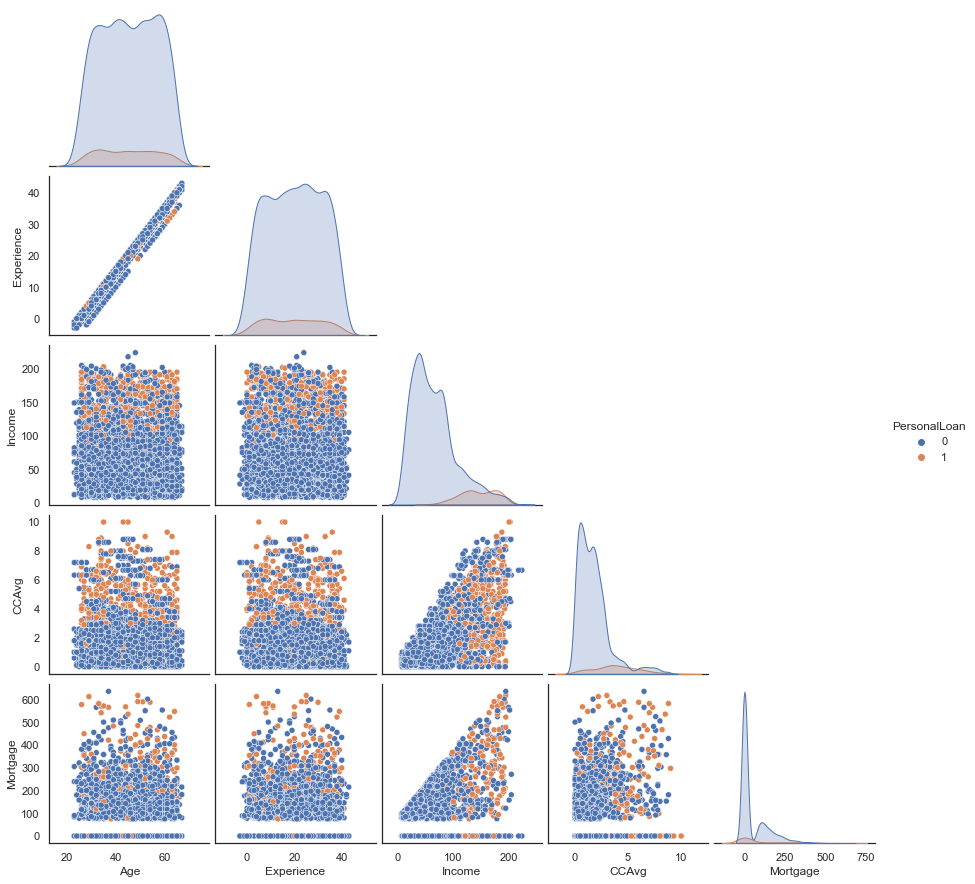

In [58]:
plt.figure(figsize=(12,8))
sns.pairplot(hue="PersonalLoan",data=df_loan,corner=True)
plt.show()

In [59]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4633 entries, 0 to 4998
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Age                4633 non-null   int64   
 1   Experience         4633 non-null   int64   
 2   Income             4633 non-null   int64   
 3   ZIPCode            4633 non-null   category
 4   Family             4633 non-null   category
 5   CCAvg              4633 non-null   float64 
 6   Education          4633 non-null   category
 7   Mortgage           4633 non-null   int64   
 8   PersonalLoan       4633 non-null   category
 9   SecuritiesAccount  4633 non-null   category
 10  CDAccount          4633 non-null   category
 11  Online             4633 non-null   category
 12  CreditCard         4633 non-null   category
 13  County             4633 non-null   category
 14  Agebin             4633 non-null   category
 15  Income_group       4633 non-null   category
 16  Spending   

In [60]:
def bar_plot(data,X,Y):
    fig=sns.barplot(x=X,y=Y,data=data)
    sns.despine(top=True,left=True,right=True)
    for f in fig.patches:
        text=f"{(f.get_height()).round(2)}"
        fig.annotate(text,(f.get_x()+f.get_width()/2,f.get_height()),ha="center",va="center")
    plt.show()

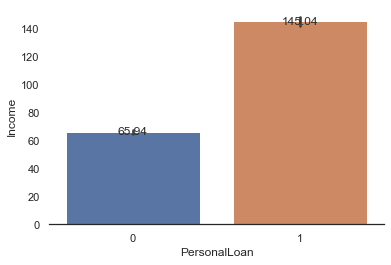

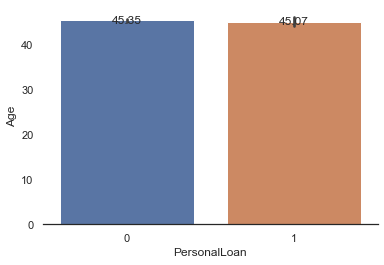

In [61]:
bar_plot(df_loan,"PersonalLoan","Income")
bar_plot(df_loan,"PersonalLoan","Age")

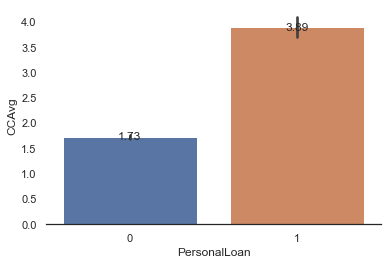

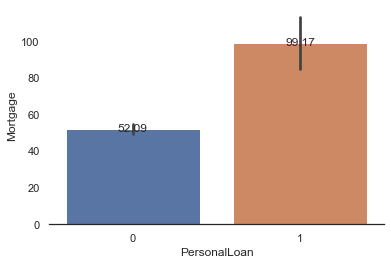

In [62]:
bar_plot(df_loan,"PersonalLoan","CCAvg")
bar_plot(df_loan,"PersonalLoan","Mortgage")

<AxesSubplot:xlabel='Income_group', ylabel='count'>

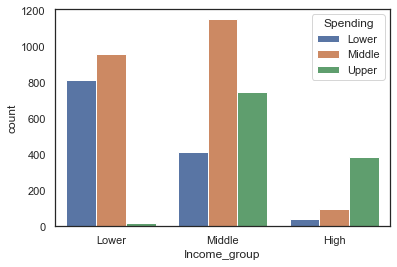

In [63]:
sns.countplot(x=df_loan["Income_group"],hue=df_loan["Spending"])

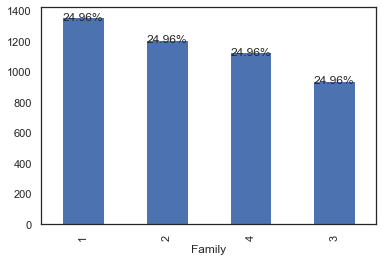

In [64]:
fig=df_loan["Family"].value_counts().plot(kind="bar")
for f in fig.patches:
        texf=f"{(f.get_height()/len(df_loan)*100).round(2)}%"
        fig.annotate(text,(f.get_x()+f.get_width()/2,f.get_height()),ha="center",va="center")
plt.show()

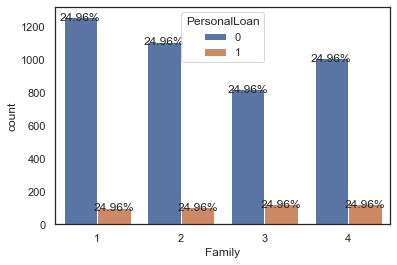

In [65]:

fig=sns.countplot(x="Family",data=df_loan,hue="PersonalLoan")
for f in fig.patches:
    texf=f"{(f.get_height()/len(df_loan)*100).round(2)}%"

    fig.annotate(text,(f.get_x()+f.get_width()/2,f.get_height()),ha="center",va="center")
plt.show()

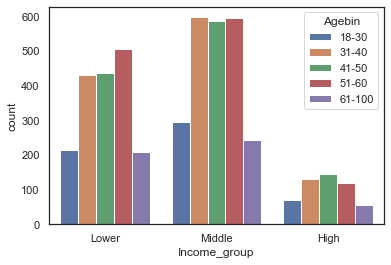

In [66]:
fig=sns.countplot(hue="Agebin",x="Income_group",data=df_loan)


<AxesSubplot:xlabel='PersonalLoan', ylabel='count'>

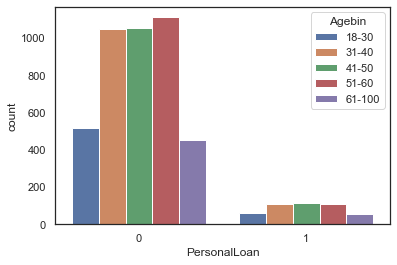

In [67]:
sns.countplot(hue="Agebin",x="PersonalLoan",data=df_loan)

<AxesSubplot:xlabel='Spending', ylabel='count'>

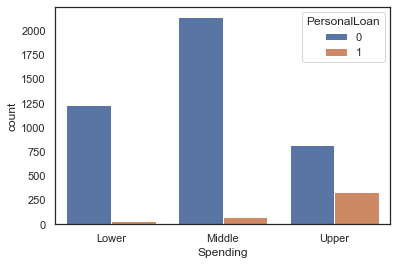

In [68]:
sns.countplot(data=df_loan,x="Spending",hue="PersonalLoan")

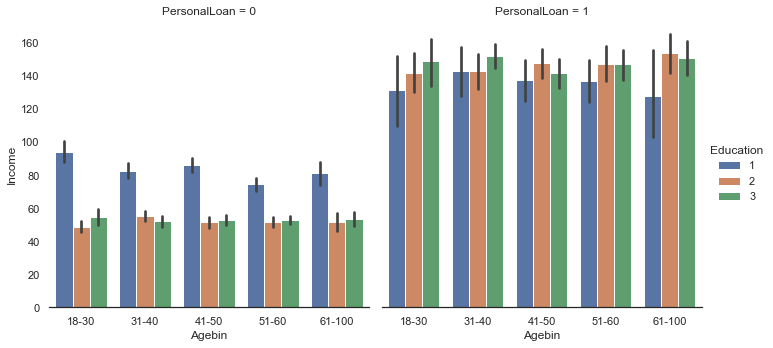

In [69]:
sns.catplot(y='Income',x='Agebin',hue='Education',kind='bar',col="PersonalLoan", data=df_loan)
sns.despine(top=True,right=True,left=True) # to remove side line from graph


# Outlier Detection

In [70]:
#We check above when check data spread that there are 3 features which have outliers Income,Mortgage,CCAvg

In [71]:
df_loan.sort_values(by=["Income"],ascending=False).head(10)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,County,Agebin,Income_group,Spending,Regions
3896,48,24,224,93940,2,6.67,1,0,0,0,1,1,1,Monterey County,41-50,High,Upper,Bay Area
4993,45,21,218,91801,2,6.67,1,0,0,0,0,1,0,Los Angeles County,41-50,High,Upper,Los Angeles Region
2988,46,21,205,95762,2,8.80,1,181,0,1,0,1,0,El Dorado County,41-50,High,Upper,Central
526,26,2,205,93106,1,6.33,1,271,0,0,0,0,1,Santa Barbara County,18-30,High,Upper,Southern
4225,43,18,204,91902,2,8.80,1,0,0,0,0,1,0,San Diego County,41-50,High,Upper,Southern
2278,30,4,204,91107,2,4.50,1,0,0,0,0,1,0,Los Angeles County,18-30,High,Upper,Los Angeles Region
2101,35,5,203,95032,1,10.00,3,0,1,0,0,0,0,Santa Clara County,31-40,High,Upper,Bay Area
3804,47,22,203,95842,2,8.80,1,0,0,0,0,1,0,Sacramento County,41-50,High,Upper,Central
3608,59,35,202,94025,1,4.70,1,553,0,0,0,0,0,San Mateo County,51-60,High,Upper,Bay Area
787,45,15,202,91380,3,10.00,3,0,1,0,0,0,0,Los Angeles County,41-50,High,Upper,Los Angeles Region


In [72]:
df_loan.loc[df_loan["Income"]==224].sort_values(by=["Age","Experience"],ascending=False)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,County,Agebin,Income_group,Spending,Regions
3896,48,24,224,93940,2,6.67,1,0,0,0,1,1,1,Monterey County,41-50,High,Upper,Bay Area


In [73]:
display(df_loan["Age"].max())
display(df_loan["Experience"].max())

67

43

In [74]:
df_loan.loc[(df_loan["Age"]==67) & (df_loan["Experience"]==43)].sort_values(by=["Income"],ascending=False)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,County,Agebin,Income_group,Spending,Regions
2846,67,43,105,93711,4,1.7,2,0,0,0,0,1,0,Fresno County,61-100,Middle,Middle,Central
3886,67,43,79,95616,4,1.7,2,215,0,0,1,1,1,Yolo County,61-100,Middle,Middle,Central
4360,67,43,41,90024,2,1.1,1,0,0,0,0,0,0,Los Angeles County,61-100,Lower,Middle,Los Angeles Region


In [75]:
df_loan.loc[(df_loan["Age"]==48) & (df_loan["Experience"]==24)].sort_values(by=["Income"],ascending=False)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,County,Agebin,Income_group,Spending,Regions
3896,48,24,224,93940,2,6.67,1,0,0,0,1,1,1,Monterey County,41-50,High,Upper,Bay Area
196,48,24,165,93407,1,5.00,1,0,0,0,0,0,1,San Luis Obispo County,41-50,High,Upper,Southern
2217,48,24,162,91355,4,3.30,2,446,1,0,1,1,0,Los Angeles County,41-50,High,Upper,Los Angeles Region
4629,48,24,148,91311,2,3.30,1,0,0,0,1,1,1,Los Angeles County,41-50,High,Upper,Los Angeles Region
4167,48,24,144,94025,4,3.50,2,0,1,0,0,0,0,San Mateo County,41-50,High,Upper,Bay Area
1763,48,24,134,94105,1,5.00,1,0,0,0,0,0,1,San Francisco County,41-50,Middle,Upper,Bay Area
1866,48,24,90,94523,1,2.60,2,334,0,0,0,1,0,Contra Costa County,41-50,Middle,Upper,Bay Area
761,48,24,84,92152,3,0.70,1,166,0,0,0,1,0,San Diego County,41-50,Middle,Lower,Southern
2548,48,24,80,91343,1,2.70,1,0,0,0,0,1,0,Los Angeles County,41-50,Middle,Upper,Los Angeles Region
1705,48,24,79,90245,4,1.40,2,0,0,1,0,0,1,Los Angeles County,41-50,Middle,Middle,Los Angeles Region


In [76]:
#checking extreme value of mortgage
df_loan.sort_values(by=["Mortgage"],ascending=False).head(20)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,County,Agebin,Income_group,Spending,Regions
2934,37,13,195,91763,2,6.5,1,635,0,0,0,1,0,San Bernardino County,31-40,High,Upper,Southern
303,49,25,195,95605,4,3.0,1,617,1,0,0,0,0,Yolo County,41-50,High,Upper,Central
4812,29,4,184,92126,4,2.2,3,612,1,0,0,1,0,San Diego County,18-30,High,Middle,Southern
1783,53,27,192,94720,1,1.7,1,601,0,0,0,1,0,Alameda County,51-60,High,Middle,Bay Area
4842,49,23,174,95449,3,4.6,2,590,1,0,0,0,0,Mendocino County,41-50,High,Upper,Superior
1937,51,25,181,95051,1,3.3,3,589,1,1,1,1,0,Santa Clara County,51-60,High,Upper,Bay Area
782,54,30,194,92056,3,6.0,3,587,1,1,1,1,1,San Diego County,51-60,High,Upper,Southern
2769,33,9,183,91320,2,8.8,3,582,1,0,0,1,0,Ventura County,31-40,High,Upper,Southern
4655,33,7,188,95054,2,7.0,2,581,1,0,0,0,0,Santa Clara County,31-40,High,Upper,Bay Area
4345,26,1,184,94608,2,4.2,3,577,1,0,1,1,1,Alameda County,18-30,High,Upper,Bay Area


In [77]:
#checking extreme value of CCAvg
df_loan.sort_values(by=["CCAvg"],ascending=False).head(20)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,County,Agebin,Income_group,Spending,Regions
2337,43,16,201,95054,1,10.0,2,0,1,0,0,0,1,Santa Clara County,41-50,High,Upper,Bay Area
2101,35,5,203,95032,1,10.0,3,0,1,0,0,0,0,Santa Clara County,31-40,High,Upper,Bay Area
787,45,15,202,91380,3,10.0,3,0,1,0,0,0,0,Los Angeles County,41-50,High,Upper,Los Angeles Region
3943,61,36,188,91360,1,9.3,2,0,1,0,0,0,0,Ventura County,61-100,High,Upper,Southern
1339,52,25,180,94545,2,9.0,2,297,1,0,0,1,0,Alameda County,51-60,High,Upper,Bay Area
3822,63,33,178,91768,4,9.0,3,0,1,0,0,0,0,Los Angeles County,61-100,High,Upper,Los Angeles Region
9,34,9,180,93023,1,8.9,3,0,1,0,0,0,0,Ventura County,31-40,High,Upper,Southern
2988,46,21,205,95762,2,8.8,1,181,0,1,0,1,0,El Dorado County,41-50,High,Upper,Central
881,44,19,154,92116,2,8.8,1,0,0,0,0,1,0,San Diego County,41-50,High,Upper,Southern
3804,47,22,203,95842,2,8.8,1,0,0,0,0,1,0,Sacramento County,41-50,High,Upper,Central


In [78]:
#drop column which we don't need for modelling
df_loan.drop(columns=["Agebin", "ZIPCode","County",'Experience','Income_group','Spending'], inplace=True)

In [79]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4633 entries, 0 to 4998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Age                4633 non-null   int64   
 1   Income             4633 non-null   int64   
 2   Family             4633 non-null   category
 3   CCAvg              4633 non-null   float64 
 4   Education          4633 non-null   category
 5   Mortgage           4633 non-null   int64   
 6   PersonalLoan       4633 non-null   category
 7   SecuritiesAccount  4633 non-null   category
 8   CDAccount          4633 non-null   category
 9   Online             4633 non-null   category
 10  CreditCard         4633 non-null   category
 11  Regions            4633 non-null   object  
dtypes: category(7), float64(1), int64(3), object(1)
memory usage: 249.8+ KB


In [80]:
df_loan.head(5)

,Age,Income,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,Regions
0,25,49,4,1.6,1,0,0,1,0,0,0,Los Angeles Region
1,45,34,3,1.5,1,0,0,1,0,0,0,Los Angeles Region
2,39,11,1,1.0,1,0,0,0,0,0,0,Bay Area
3,35,100,1,2.7,2,0,0,0,0,0,0,Bay Area
4,35,45,4,1.0,2,0,0,0,0,0,1,Los Angeles Region


In [81]:
from sklearn.preprocessing import OneHotEncoder

In [108]:
X=df_loan.drop(["PersonalLoan"],axis=1)
Y=df_loan["PersonalLoan"]


In [114]:
oneHotCols=['Regions','Education']
X=pd.get_dummies(X,columns=oneHotCols,drop_first=True)

In [115]:
#Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state = 1,stratify=Y)

ValueError: X has 15 features, but OneHotEncoder is expecting 4633 features as input.